## Chinese MNIST

In [55]:
import pandas as pd
df=pd.read_csv('./chinese_mnist.csv')
df.groupby(["value","character"]).size()

value      character
0          零            1000
1          一            1000
2          二            1000
3          三            1000
4          四            1000
5          五            1000
6          六            1000
7          七            1000
8          八            1000
9          九            1000
10         十            1000
100        百            1000
1000       千            1000
10000      万            1000
100000000  亿            1000
dtype: int64

In [118]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [119]:
# load the data
IMAGE_DIR="./data"
TRAIN_DIR="./data"
TEST_DIR="./data"

def load_data():
    file_list = glob.glob(IMAGE_DIR + "/*.jpg")
    x = []
    y = []

    for fname in file_list:
        with Image.open(fname) as img:
            np_img = np.array(img)
        label = int(os.path.split(fname)[-1].split('.')[0].split('_')[3])-1   

        x.append(np_img)
        y.append(label)
        
    x, y = np.array(x), np.array(y)
    x = np.expand_dims(x, -1)
    x = x / 255.
    return x, y
    
X, y = load_data()

In [120]:
X.shape

(15000, 64, 64, 1)

In [121]:
len(X)

15000

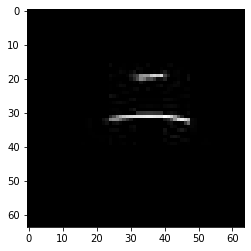

In [179]:
plt.imshow(X[14999].squeeze(2),cmap='gray')

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33333, random_state=1)

In [197]:
idx=0
for i in X_train:
    xim = i.squeeze(2)
    xim = xim*255
    img = Image.fromarray(xim)
    img = img.convert("L")

    fn = 'fig'+str(idx) 
    img.save('./train_fig/{0}.jpg'.format(fn))
    idx += 1

In [198]:
idx=0
for i in X_test:
    xim = i.squeeze(2)
    xim = xim*255
    img = Image.fromarray(xim)
    img = img.convert("L")

    fn = 'fig'+str(idx) 
    img.save('./test_fig/{0}.jpg'.format(fn))
    idx += 1

In [196]:
df_y_train=pd.DataFrame(y_train)
df_y_train.to_csv('y_train.csv')

df_y_test=pd.DataFrame(y_test)
df_y_test.to_csv('y_test.csv')